In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the CSV data
data = pd.read_csv('Resources/cleaned_listings.csv')

In [30]:
# Inspect the first few rows of the data
data.head()

id                                              name  host_id  \
0   3781.0                         HARBORSIDE-Walk to subway     4804   
1   5506.0    ** Fort Hill Inn Private! Minutes to center!**     8229   
2   6695.0     Fort Hill Inn *Sunny* 1 bedroom, condo duplex     8229   
3   8789.0               Curved Glass Studio/1bd facing Park    26988   
4  10811.0  Back Bay Apt Studio-3 blocks to Pru center & "T"    38997   

  host_acceptance_rate  host_total_listings_count neighbourhood  latitude  \
0                  33%                          5   East Boston  42.36413   
1                  99%                         14       Roxbury  42.32844   
2                  99%                         14       Roxbury  42.32802   
3                  46%                         31   Beacon Hill  42.35867   
4                  57%                         29      Back Bay  42.35173   

   longitude       property_type        room_type  ...     price  \
0  -71.02991  Entire rental unit  Entire home/apt  ...  $125.00    
1  -71.09581  Entire guest suite  Entire home/apt  ...  $139.00    
2  -71.09387        Entire condo  Entire home/apt  ...  $179.00    
3  -71.06307  Entire rental unit  Entire home/apt  ...   $92.00    
4  -71.08685  Entire rental unit  Entire home/apt  ...  $130.00    

   minimum_nights  maximum_nights  review_scores_rating  \
0              29            1125                  4.96   
1               3              90                  4.79   
2               3             730                  4.81   
3              91             365                  4.69   
4              91            1125                  4.33   

  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                   5.00                       4.96                   5.00   
1                   4.88                       4.90                   4.95   
2                   4.82                       4.87                   4.90   
3                   4.69                       4.55                   4.93   
4                   4.44                       4.67                   4.56   

   review_scores_communication  review_scores_location  review_scores_value  
0                         4.96                    4.84                 4.88  
1                         4.89                    4.56                 4.75  
2                         4.95                    4.52                 4.72  
3                         4.97                    4.97                 4.59  
4                         4.00                    5.00                 4.67  

[5 rows x 24 columns]

In [31]:
# Process Data: Count the number of listings per host_id
host_listings_count = data['host_id'].value_counts().reset_index()
host_listings_count.columns = ['host_id', 'listings_count']

In [32]:
# Select top 25 hosts
top_hosts = host_listings_count.head(25)

In [33]:
# Prepare data for Bokeh
source = ColumnDataSource(top_hosts)

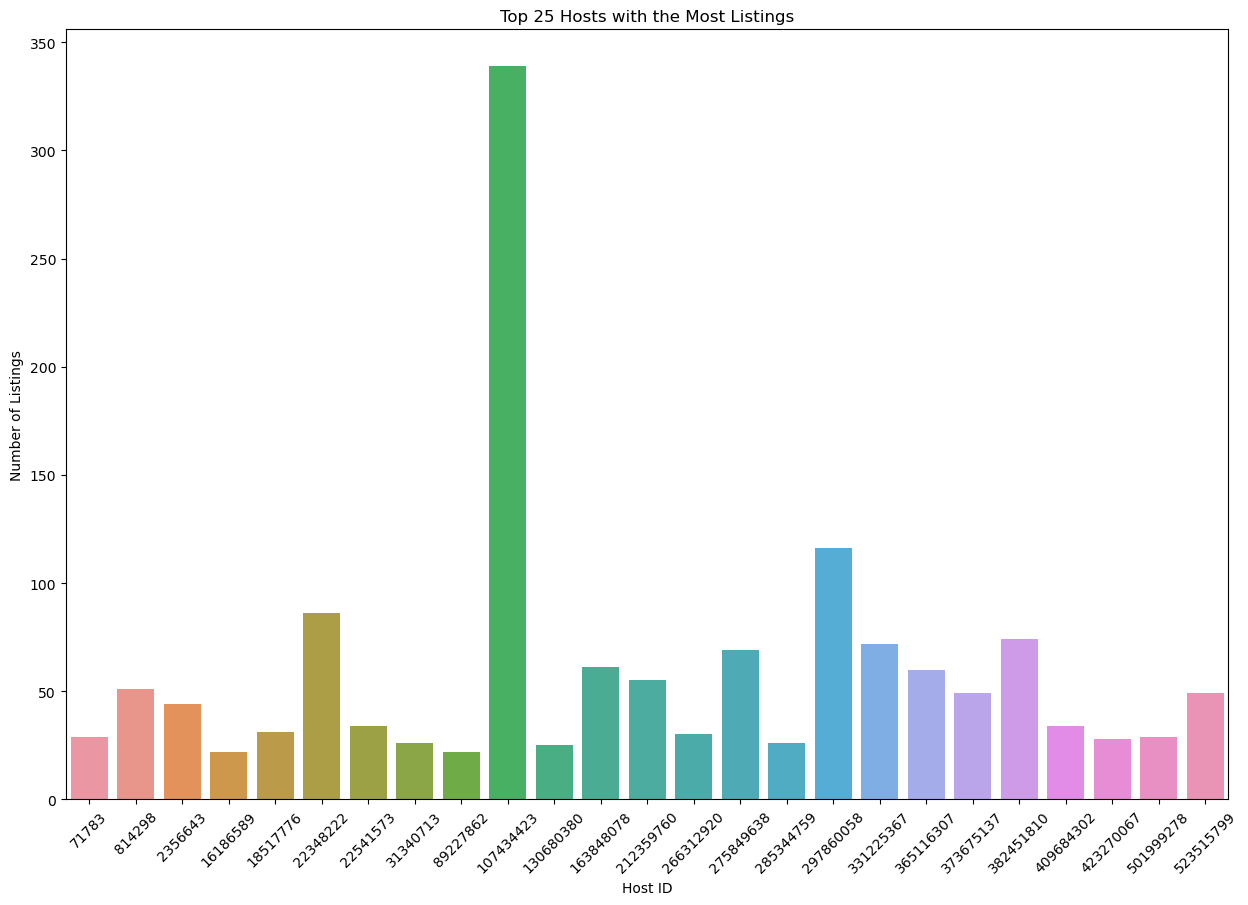

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x='host_id', y='listings_count', data=host_listings_count.head(25))
plt.title('Top 25 Hosts with the Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Clean and convert the 'price' column to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [37]:
# Process Data: Calculate the average price per neighborhood
avg_price_neighborhood = data.groupby('neighbourhood')['price'].mean().reset_index()

In [38]:
# Sort by average price for better visualization
avg_price_neighborhood = avg_price_neighborhood.sort_values(by='price', ascending=False)

In [39]:
# Prepare data for Bokeh
source = ColumnDataSource(avg_price_neighborhood)

In [40]:
# Create the bar chart using Bokeh
p = figure(y_range=avg_price_neighborhood['neighbourhood'].tolist(), height=600, width=800, title="Average Price by Neighborhood",
           toolbar_location=None, tools="", x_axis_label='Average Price', y_axis_label='Neighborhood')

p.hbar(y='neighbourhood', right='price', height=0.4, source=source, color="green")

p.xaxis.axis_label = 'Average Price'
p.yaxis.axis_label = 'Neighborhood'
p.yaxis.major_label_orientation = 1.0


In [41]:
# Save the chart as an HTML file
output_file('average_price_by_neighborhood.html')

In [42]:
# Show the plot
show(p, notebook_handle=True)

In [46]:
# Clean and convert the 'price' column to numeric
# Remove any currency symbols and commas, and convert to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [47]:
# Process Data: Calculate the average price per neighborhood
avg_price_neighborhood = data.groupby('neighbourhood')['price'].mean().reset_index()

In [48]:
# Sort by average price for better visualization
avg_price_neighborhood = avg_price_neighborhood.sort_values(by='price', ascending=False)

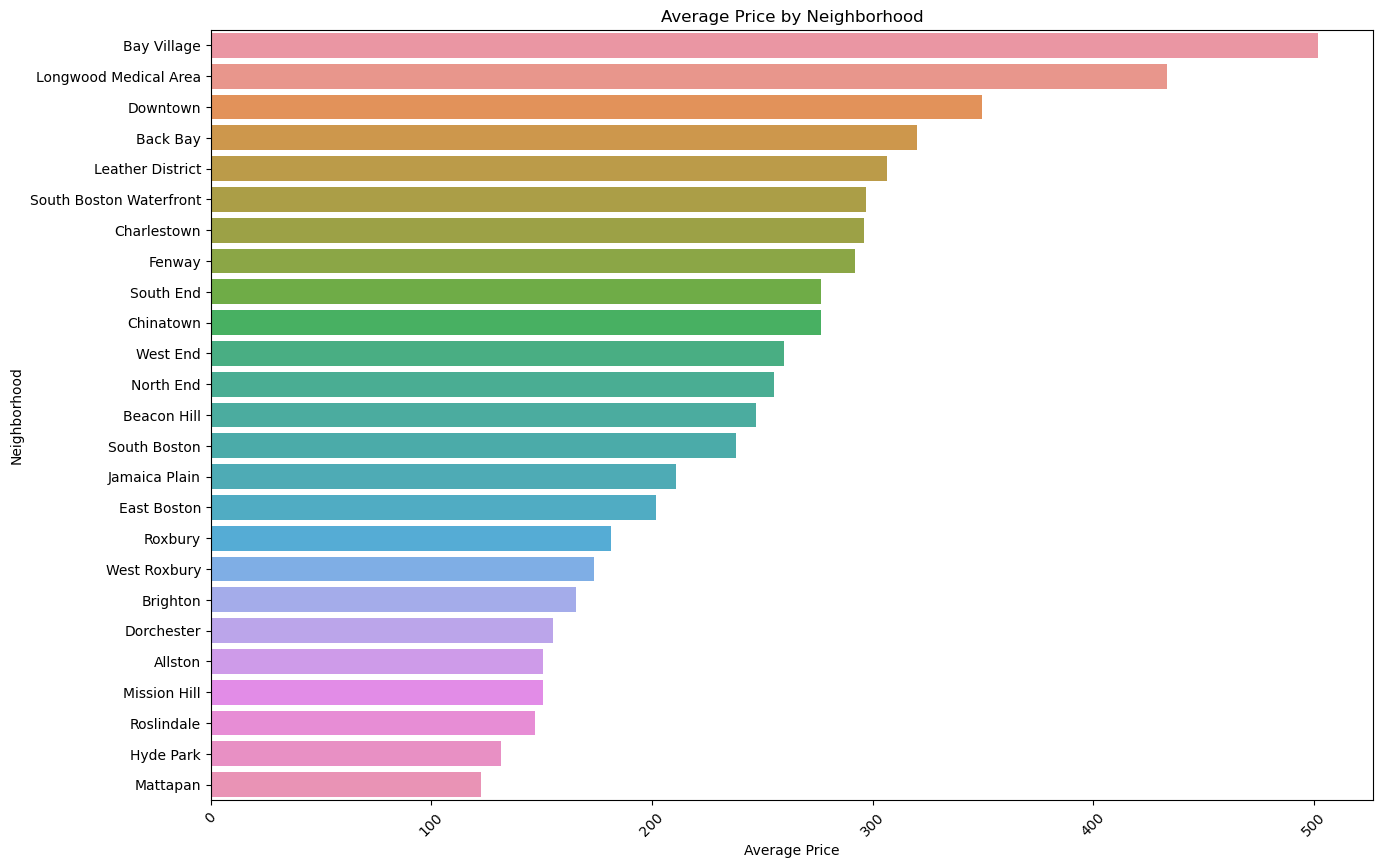

In [49]:
# Visualize Data: Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='price', y='neighbourhood', data=avg_price_neighborhood)
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.savefig('average_price_by_neighborhood.png')
plt.show()

In [60]:
# Filter out rows with missing review scores and review_scores_cleanliness
data = data.dropna(subset=['review_scores_rating', 'review_scores_cleanliness'])

# Prepare data for Bokeh
source = ColumnDataSource(data)

In [61]:
# Perform linear regression to find the line of best fit
x = data['review_scores_cleanliness']
y = data['review_scores_rating']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

In [62]:
# Create the scatter plot using Bokeh
p = figure(height=600, width=800, title="Review Scores Cleanliness vs. Review Scores Rating",
           toolbar_location="above", tools="pan,box_zoom,reset,save",
           x_axis_label='Review Scores Cleanliness', y_axis_label='Review Scores Rating')

# Add jitter to the review_scores_rating for better visualization
p.circle('review_scores_cleanliness', jitter('review_scores_rating', width=0.2, range=p.y_range), size=8, source=source, color="navy", alpha=0.5)

# Add line of best fit
p.line(x, y_fit, color="red", legend_label='Best Fit Line', line_width=2)


GlyphRenderer(id='p1357', ...)

In [63]:
# Save the chart as an HTML file
output_file('review_scores_cleanliness_vs_review_scores_rating.html')

# Display the plot inline in the notebook
output_notebook()
show(p)

Loading BokehJS ...

In [78]:
# Filter out rows with missing review_scores_location or neighbourhood
data = data.dropna(subset=['review_scores_location', 'neighbourhood'])

In [79]:
# Calculate the average review_scores_location for each neighborhood
avg_scores = data.groupby('neighbourhood')['review_scores_location'].mean().reset_index()

# Prepare data for Bokeh
source = ColumnDataSource(avg_scores)

In [80]:
# Get a list of unique neighborhoods
neighborhoods = avg_scores['neighbourhood'].tolist()

# Create the bar chart using Bokeh
p = figure(x_range=neighborhoods, height=600, width=800, title="Average Review Scores Location by Neighborhood",
           toolbar_location="above", tools="pan,box_zoom,reset,save",
           x_axis_label='Neighborhood', y_axis_label='Average Review Scores Location')

# Add bars to the chart
p.vbar(x='neighbourhood', top='review_scores_location', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('neighbourhood', palette=Spectral6, factors=neighborhoods))

# Customize plot
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1.2

In [81]:
# Save the chart as an HTML file
output_file('average_review_scores_location_by_neighborhood.html')

# Display the plot inline in the notebook
output_notebook()
show(p)

Loading BokehJS ...